# 과일 사진 데이터 준비

In [4]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-07-23 04:26:07--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-23 04:26:07--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-23 04:26:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

# 모듈

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 데이터 불러오고 시각화

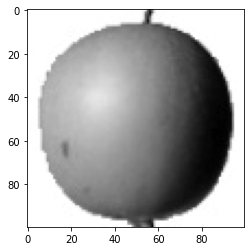

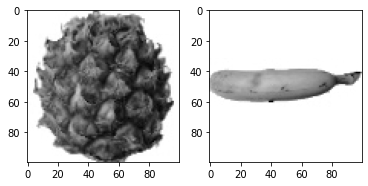

In [ ]:
fruits = np.load('fruits_300.npy')

plt.imshow(fruits[0],cmap='gray_r')
plt.show()

fig, axs = plt.subplots(1,2)

axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

# 픽셀값 분석하기

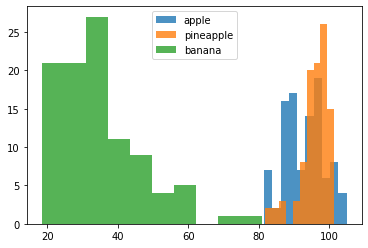

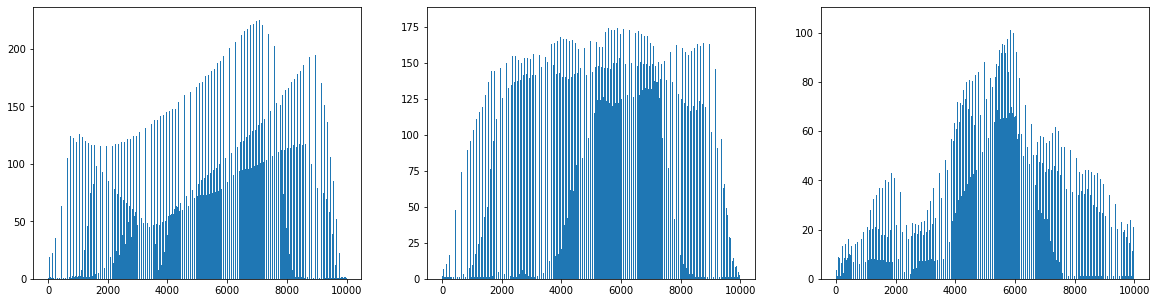

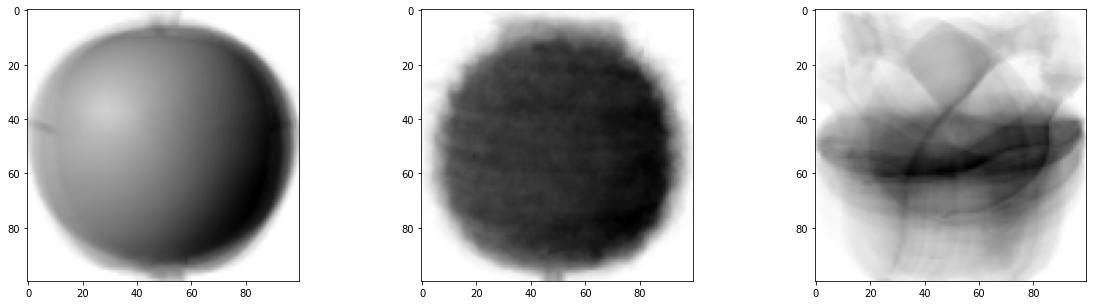

In [ ]:
apple = fruits[0:100].reshape(-1,100 * 100)
pineapple = fruits[100:200].reshape(-1,100 * 100)
banana = fruits[200:300].reshape(-1,100 * 100)

plt.hist(np.mean(apple,axis=1), alpha=0.8)
plt.hist(np.mean(pineapple,axis=1), alpha=0.8)
plt.hist(np.mean(banana,axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])

fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple,axis=0))
axs[1].bar(range(10000), np.mean(pineapple,axis=0))
axs[2].bar(range(10000), np.mean(banana,axis=0))
plt.show()


apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean  , cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

# 평균값과 가까운 사진 고르기

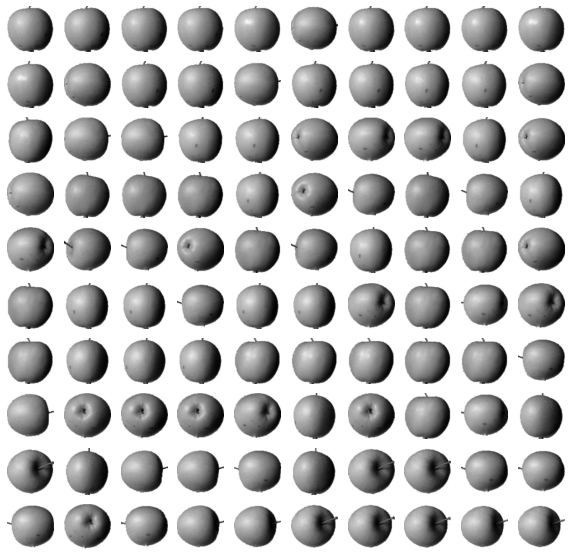

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

# K-Mean 알고리즘

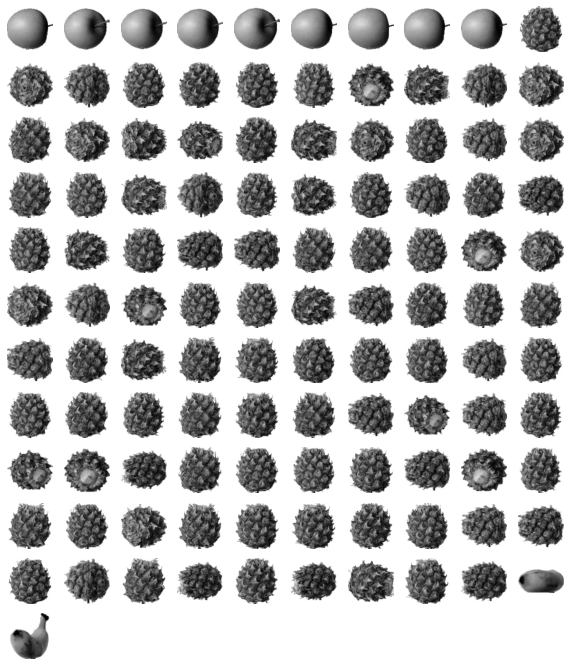

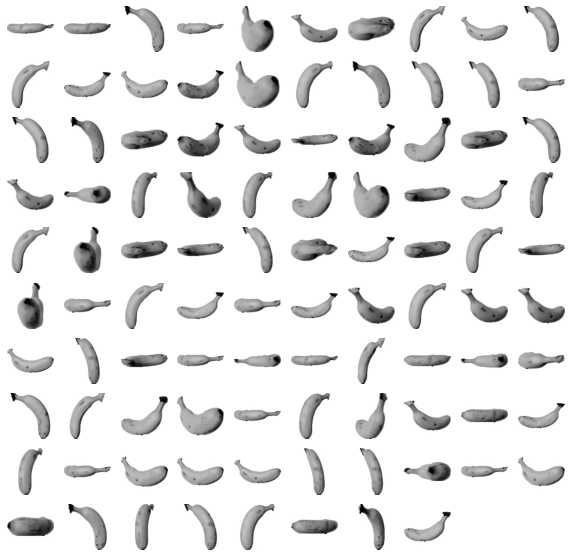

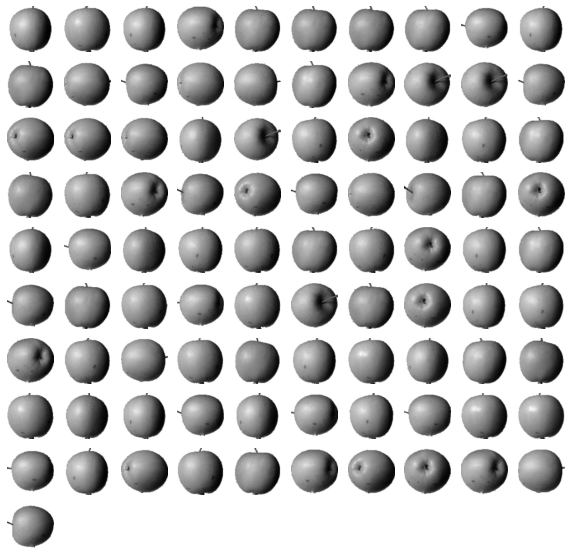

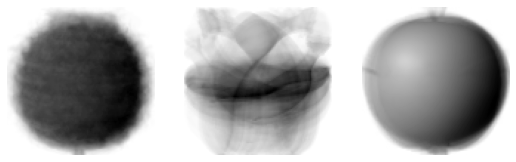

In [13]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n / 10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:  axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

draw_fruits(fruits[km.labels_==0])
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])

draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

# 클러스터 중심까지 거리 변환

In [22]:
print(km.transform(fruits_2d[100:101]))
print(km.predict(fruits_2d[100:101]))


[[3393.8136117  8837.37750892 5267.70439881]]
[0]


# 최적의 k 찾기

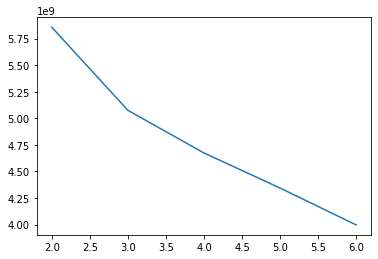

In [24]:
inertia = []

for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.show()

# PCA

## 데이터 축소

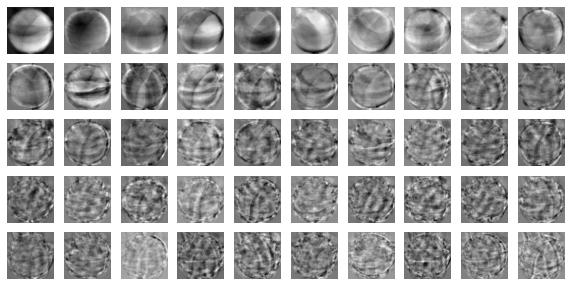

(300, 50)


In [29]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

pca = PCA(n_components=50)
pca.fit(fruits_2d)

draw_fruits(pca.components_.reshape(-1,100,100))

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

## 축소된 데이터 복구


(300, 10000)


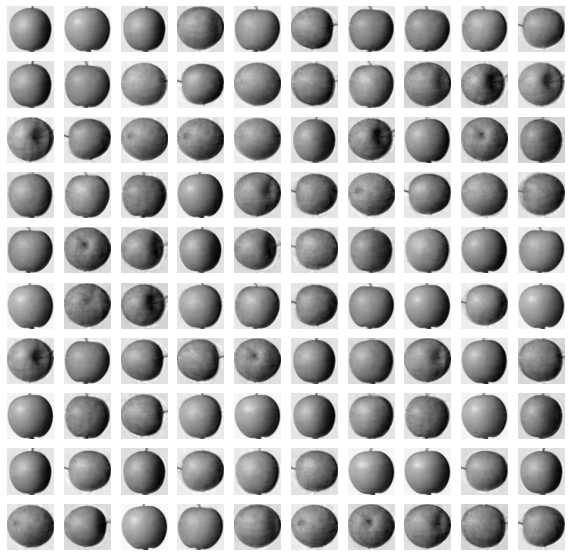

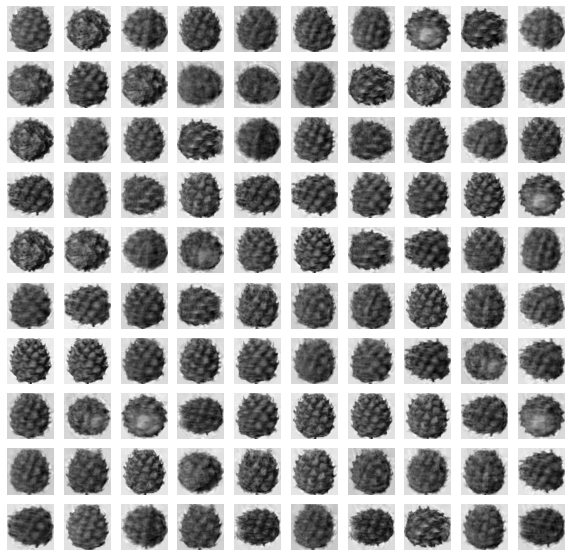

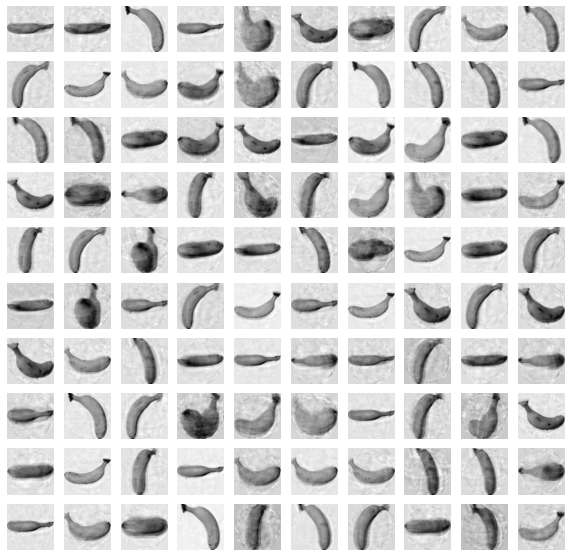

In [31]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  

## 설명된 분산

0.9214654755471039


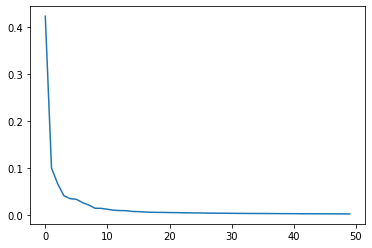

In [33]:
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()